<center> <h1> Assignment II-NLP </h1> </center>

<h1> Author: Adi Douchan & Lilac Muhanna  </h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dropout, Conv1D, Flatten, Dense, Embedding, SpatialDropout1D,  MaxPooling1D, GlobalMaxPooling1D
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
import warnings
from nltk.tokenize import ToktokTokenizer
from gensim.models import Word2Vec

# Initialize the ToktokTokenizer
tokenizer = ToktokTokenizer()
warnings.simplefilter(action='ignore', category=FutureWarning)

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
train_df = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20II%20-%20NLP/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20II%20-%20NLP/test.csv')
train_before=train_df.copy()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Lets Start exploring the data**

In [ ]:
train_df.head()

,Dialogue,Character,Episode,Show,Dialogue_length
0,Hey.,joey,Season-07 Episode-13-The One Where Rosita Dies,Friends,1
1,(to Joey) Are you gonna be embarrassed going ...,phoebe,Season-10 Episode-04-The One With The Cake,Friends,13
2,"Me? No no no, you. You're gonna tell him. I'm ...",elaine,S03E22,Seinfeld,14
3,Alright you guys are off to party number one ...,chandler,Season-02 Episode-22-The One With the Two Parties,Friends,56
4,Am I? Or am I so sane that you just blew your ...,kramer,S05E12,Seinfeld,13


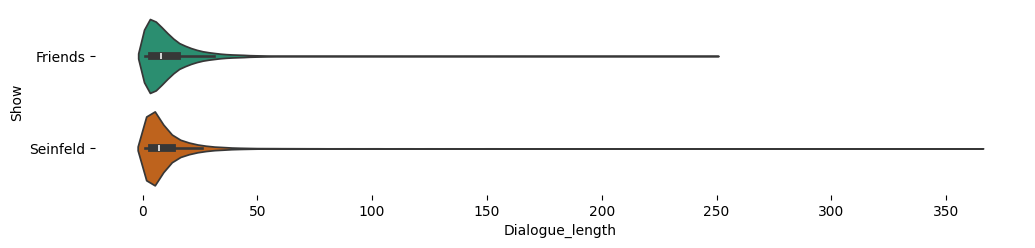

In [ ]:
# @title Show vs Dialogue_length

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(train_df['Show'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_df, x='Dialogue_length', y='Show', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
train_df.iloc[60300, 0]

' Now that\'s a little spoiled. He was supposed to type "little", the idiot.'

In [ ]:
test_df.head()

,Dialogue,Character,Episode,Show,Dialogue_length
0,"Oh my God, that's great! I'm smart!! No, no, ...",joey,Season-10 Episode-05-The One Where Rachel's Si...,Friends,30
1,"Listen, I’m sure that dad doesn’t care. He pr...",monica,Season-07 Episode-03-The One With Phoebe’s Coo...,Friends,20
2,Well I am. Couldn't you try to go through some...,george,S09E16,Seinfeld,18
3,Yes I am. We had a verbal contract. If we can'...,kramer,S07E13,Seinfeld,20
4,"Um, I straightened out your shower curtain so...",monica,Season-02 Episode-18-The One Where Dr. Remore ...,Friends,17


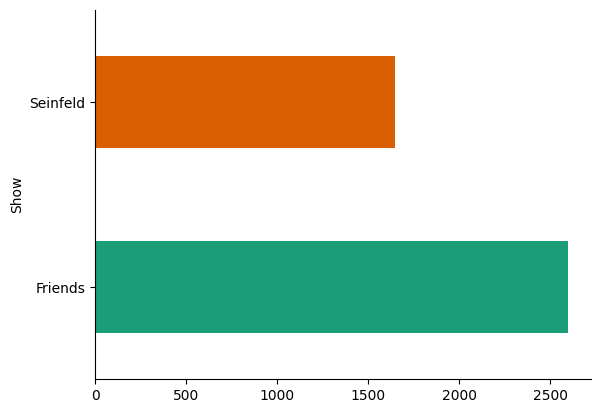

In [ ]:
# @title Show

from matplotlib import pyplot as plt
import seaborn as sns
test_df.groupby('Show').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
test_df.iloc[3000, 0]

" Well, y'know two regulars. And ah one that barely qualifies as... (starts to kiss her again, but she gets up.) Ahh, what?"

In [ ]:


# Summary statistics for numerical columns
print("-----------------------------train--------------------------------------------")
print(train_df.describe())
print("-----------------------------test--------------------------------------------")
print(test_df.describe())
print("-----------------------------train--------------------------------------------")

# Check for missing values
print(train_df.isnull().sum())
print("-----------------------------test--------------------------------------------")

print(test_df.isnull().sum())
print("-----------------------------train--------------------------------------------")
# Check the distribution of classes (Shows)
print(train_df['Show'].value_counts())
print("-----------------------------test--------------------------------------------")

print(test_df['Show'].value_counts())


-----------------------------train--------------------------------------------
       Dialogue_length
count     70405.000000
mean         11.002131
std          12.125423
min           1.000000
25%           4.000000
50%           8.000000
75%          14.000000
max         363.000000
-----------------------------test--------------------------------------------
       Dialogue_length
count      4245.000000
mean         26.274441
std          15.380941
min          15.000000
25%          17.000000
50%          22.000000
75%          30.000000
max         234.000000
-----------------------------train--------------------------------------------
Dialogue           0
Character          0
Episode            0
Show               0
Dialogue_length    0
dtype: int64
-----------------------------test--------------------------------------------
Dialogue           0
Character          0
Episode            0
Show               0
Dialogue_length    0
dtype: int64
-----------------------------train--


# 1.  We can see that the mean for the dialogue length is somewhere between 11-26 (for both train and test)
# 2.   No Null values
# 3. the label is nearly balanced 45% vs 55%





# **Lets dig deeper into Analyzing Dialogue Lengths**

Text(0, 0.5, 'Frequency')

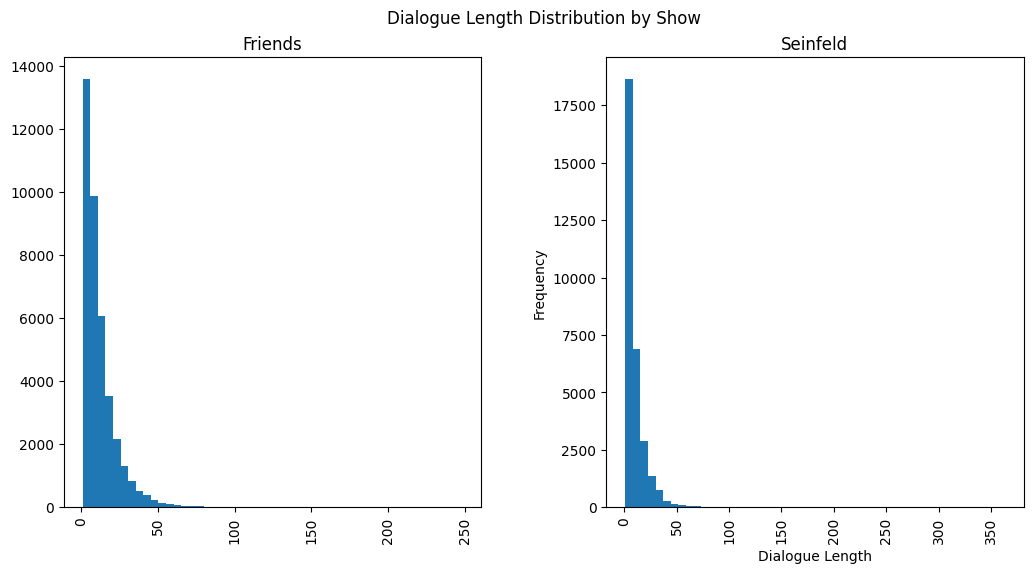

In [ ]:
train_df['Dialogue_length'].hist(by=train_df['Show'], bins=50, figsize=(12, 6))
plt.suptitle('Dialogue Length Distribution by Show')
plt.xlabel('Dialogue Length')
plt.ylabel('Frequency')


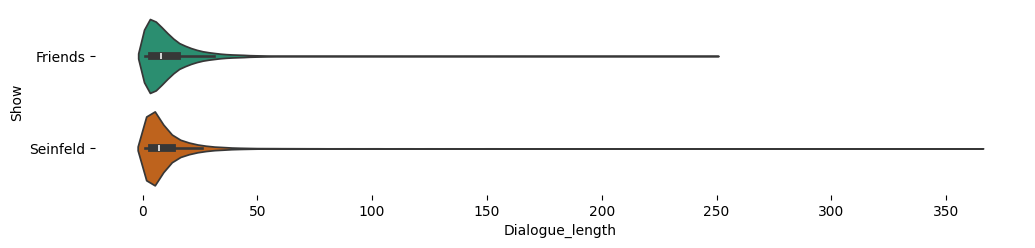

In [ ]:

figsize = (12, 1.2 * len(train_df['Show'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_df, x='Dialogue_length', y='Show', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

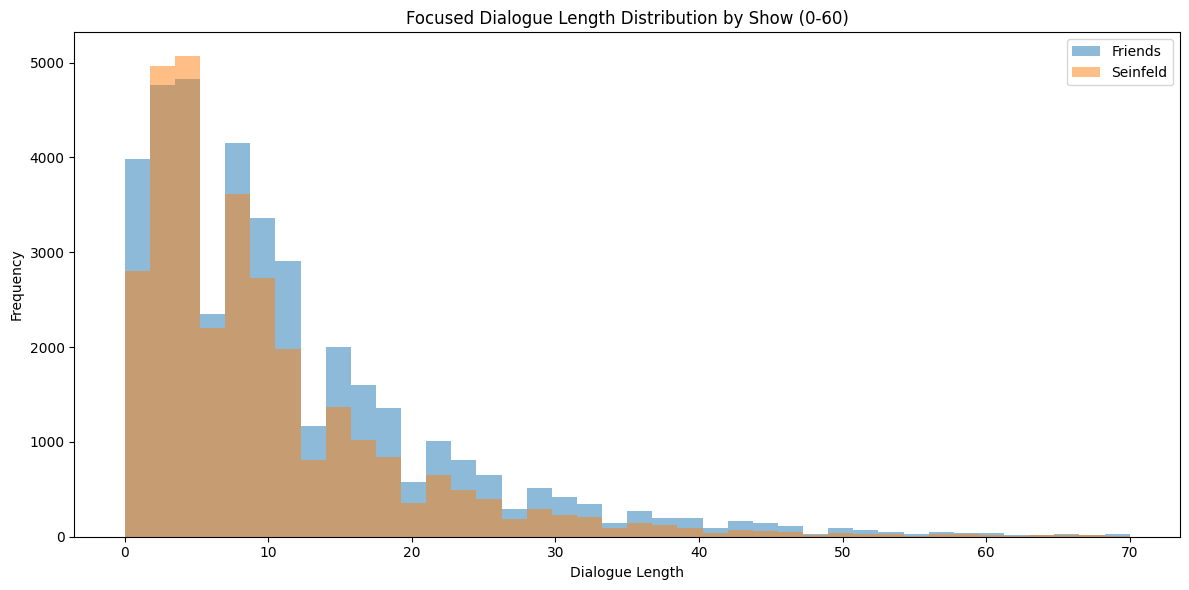

In [ ]:
plt.figure(figsize=(12, 6))

# Plotting the histograms for each show
for show in train_df['Show'].unique():
    subset = train_df[train_df['Show'] == show]
    plt.hist(subset['Dialogue_length'], bins=40, range=(0,70), alpha=0.5, label=show)

plt.title('Focused Dialogue Length Distribution by Show (0-60)')
plt.xlabel('Dialogue Length')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

We can see that the dialogue lengths are nearly the same distributed friends is slightly higher could be due to the fact it got 6k more labels than Seinfeld

# Lets do Character Analysis now because understanding which characters speak the most and their distribution across episodes could offer insights into character-specific language use.

jerry       11767
george       7781
ross         7115
rachel       6995
joey         6434
chandler     6432
elaine       6380
monica       6377
phoebe       5739
kramer       5385
Name: Character, dtype: int64


Text(0, 0.5, 'Number of Lines')

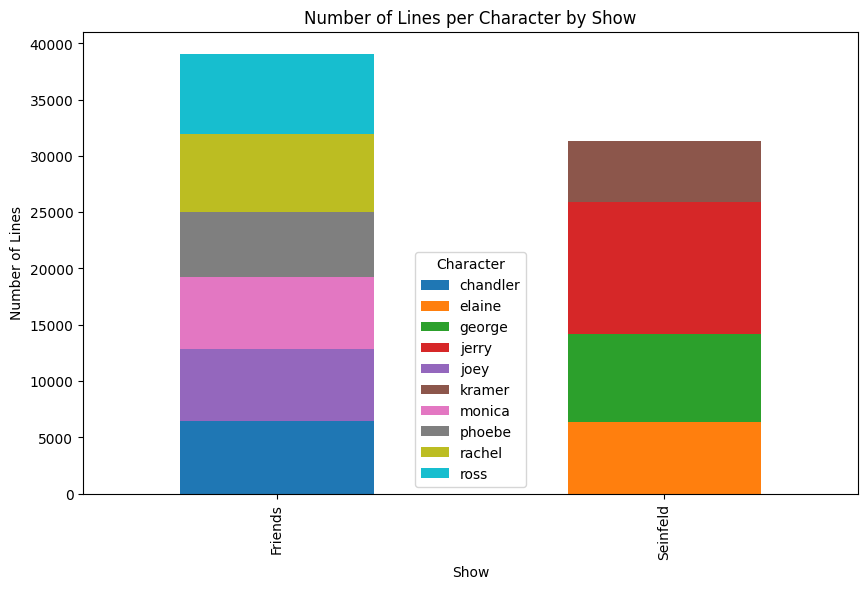

In [ ]:
# Top characters by dialogue frequency
print(train_df['Character'].value_counts().head(10))

# Comparing the number of lines per character in each show
character_counts_per_show = train_df.groupby(['Show', 'Character']).size().unstack().fillna(0)
character_counts_per_show.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Lines per Character by Show')
plt.xlabel('Show')
plt.ylabel('Number of Lines')

<Axes: >

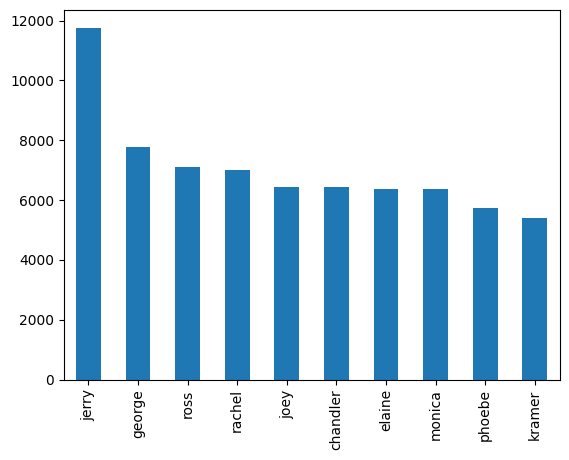

In [ ]:
train_df["Character"].value_counts().plot(kind="bar")

# We can see that Jerry Talks alot 😆

# **Text Content Analysis Looking at the most common words or phrases (excluding stop words) might reveal show-specific language or themes.**


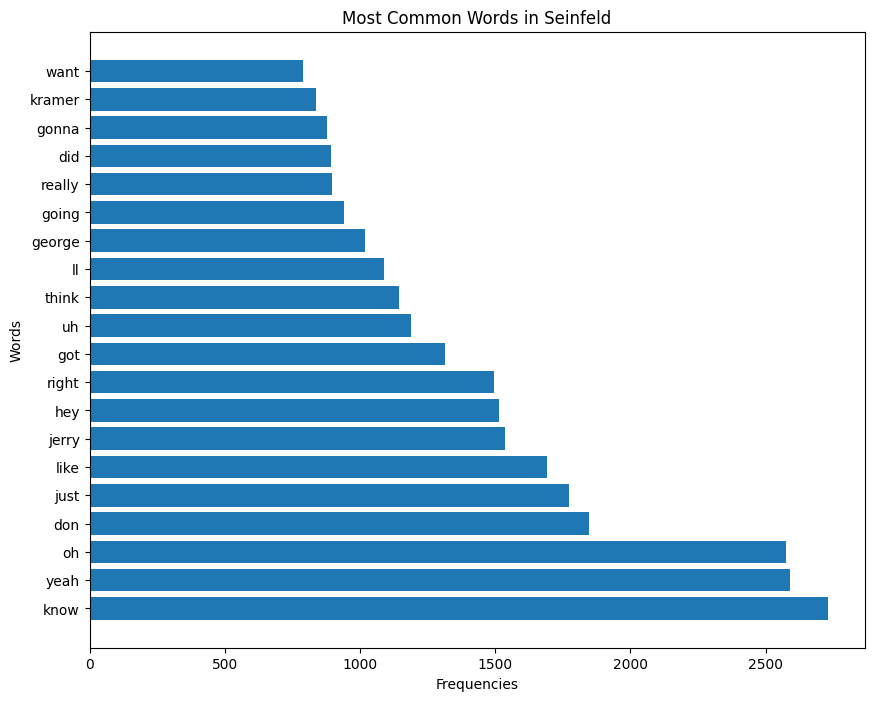

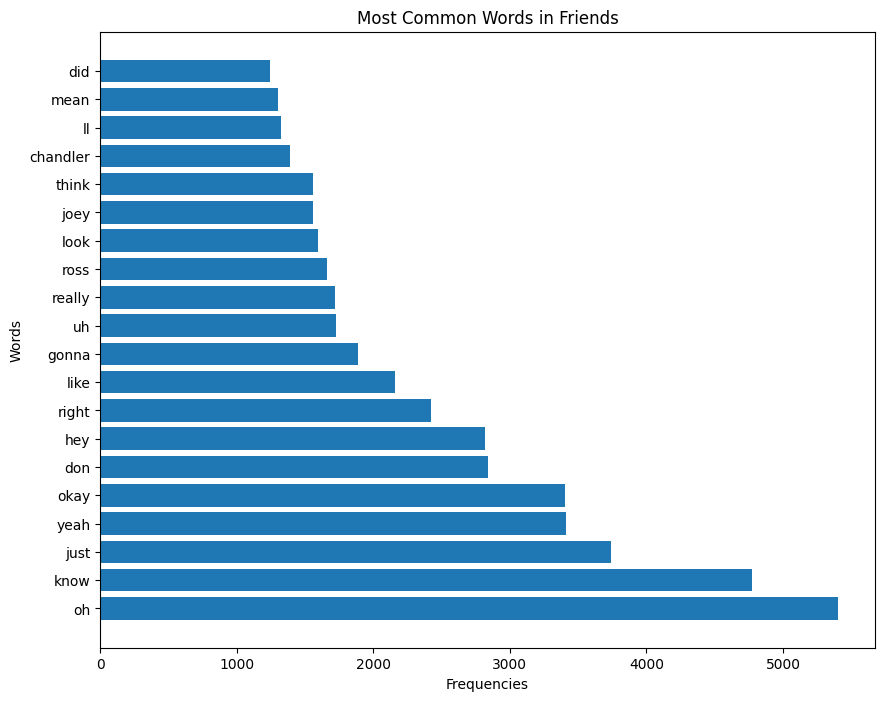

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Function to plot most common words
def plot_most_common_words(text, show_name, n=20):
    vec = CountVectorizer(stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    words, frequencies = zip(*words_freq[:n])

    plt.figure(figsize=(10, 8))
    plt.barh(words, frequencies)
    plt.xlabel('Frequencies')
    plt.ylabel('Words')
    plt.title(f'Most Common Words in {show_name}')
    plt.show()

# Apply to a subset or the entire dataset
plot_most_common_words(train_df[train_df['Show'] == 'Seinfeld']['Dialogue'], show_name = 'Seinfeld')
plot_most_common_words(train_df[train_df['Show'] == 'Friends']['Dialogue'], show_name = 'Friends')


# **Part 2 Data-Preprocessing**



---




In [ ]:
# Function for preprocessing text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Handle contractions and colloquial expressions
    # text = text.replace("gonna", "going to").replace("wanna", "want to")
     # more contractions can be added here
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
     # Tokenize the text into words using ToktokTokenizer
    words = tokenizer.tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize words to get the base form
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Optional: Replace character names with a placeholder
    # characters = ['jerry', 'george', 'elaine', 'kramer', 'ross', 'rachel', 'chandler', 'monica', 'joey', 'phoebe']
    # words = ['<CHARACTER>' if word in characters else word for word in words]

    return ' '.join(words)

train_df = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20II%20-%20NLP/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20II%20-%20NLP/test.csv')
# Apply preprocessing to the 'Dialogue' column in both train and test dataframes
train_df['Dialogue'] = train_df['Dialogue'].apply(preprocess_text)
test_df['Dialogue'] = test_df['Dialogue'].apply(preprocess_text)
train_df['Show'] = train_df['Show'].map({'Friends': 1, 'Seinfeld': 0}).astype(float)
test_df['Show'] = test_df['Show'].map({'Friends': 1, 'Seinfeld': 0}).astype(float)

## **We putted everything in one function to ensure more foucsed and simple way to proccess the data and apply on both train and test**

In [ ]:
for i, dialogue in enumerate(train_before['Dialogue']):

    print(f"Original Dialogue {i+1}: {dialogue}")
    print(f"Processed Dialogue {i+1}: {train_df['Dialogue'][i]}\n")

    if i==5:
      break

Original Dialogue 1:  Hey.
Processed Dialogue 1: hey

Original Dialogue 2:  (to Joey) Are you gonna be embarrassed going up there having nothing prepared?
Processed Dialogue 2: joey gonna embarrassed going nothing prepared

Original Dialogue 3: Me? No no no, you. You're gonna tell him. I'm not gonna tell- Noo.
Processed Dialogue 3: youre gonna tell im gonna tell noo

Original Dialogue 4:  Alright you guys are off to party number one [ushers 3 guys into Monica's apartment] and you, you are off to party number two [ushers four women into his apartment. Two guys try to follow and Chandler blocks them and shoos them off to Monica's apartment] Alright fellas, let's keep it movin', let' keep it movin.
Processed Dialogue 4: alright guy party number one usher 3 guy monicas apartment party number two usher four woman apartment two guy try follow chandler block shoos monicas apartment alright fella let keep movin let keep movin

Original Dialogue 5: Am I? Or am I so sane that you just blew your 

In [ ]:
# Original Dialogue 1:  Hey.
# Processed Dialogue 1: hey

# Original Dialogue 2:  (to Joey) Are you gonna be embarrassed going up there having nothing prepared?
# Processed Dialogue 2: joey gon na embarrassed going nothing prepared

# Original Dialogue 3: Me? No no no, you. You're gonna tell him. I'm not gonna tell- Noo.
# Processed Dialogue 3: youre gon na tell im gon na tell noo

# Original Dialogue 4:  Alright you guys are off to party number one [ushers 3 guys into Monica's apartment] and you, you are off to party number two [ushers four women into his apartment. Two guys try to follow and Chandler blocks them and shoos them off to Monica's apartment] Alright fellas, let's keep it movin', let' keep it movin.
# Processed Dialogue 4: alright guy party number one usher guy monicas apartment party number two usher four woman apartment two guy try follow chandler block shoos monicas apartment alright fella let keep movin let keep movin

# Original Dialogue 5: Am I? Or am I so sane that you just blew your mind?
# Processed Dialogue 5: sane blew mind

# Original Dialogue 6:  So, if you’re parents hadn’t got divorced, you’d be able to answer a question like a normal person?
# Processed Dialogue 6: youre parent hadnt got divorced youd able answer question like normal person


# this was our first attempt and we got some observations and improved:
# Colloquial Contractions: Words like "gonna" should be expanded to "going to" before stop word removal, as they may not be recognized by the standard stop word list.
# Context Preservation: Ensure that important context is not lost when removing stop words. For instance, "are you gonna" is an important phrase that, when stop words are removed, could lose its interrogative property.
# Character Names: since the goal is to distinguish between two specific shows,we  considered keeping character names, as they can be strong predictors. If we needed further goal is to generalize, then replacing them with a placeholder or removing them might be better so will keep that as an option.
# Lemmatization: we need to Make sure that words are lemmatized properly. It looks like "gonna" was not processed into "going," which might indicate a missed step in lemmatization or the need to handle colloquial terms separately.

We want also to try also stemming approach to check who would give us better results further

In [ ]:


# Define the preprocessing function with stemming
def preprocess_with_stemming(text):
    # Convert text to lowercase
    text = text.lower()
    # Handle contractions and colloquial expressions
    # text = text.replace("gonna", "going to").replace("wanna", "want to")
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text into words using ToktokTokenizer
    words = tokenizer.tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Initialize the stemmer
    stemmer = PorterStemmer()
    # Stem words
    words = [stemmer.stem(word) for word in words]
    # Return the joined words
    return ' '.join(words)




train_df_stem = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20II%20-%20NLP/train.csv')
test_df_stem = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20II%20-%20NLP/test.csv')
train_df_stem['Dialogue'] = train_df_stem['Dialogue'].apply(preprocess_with_stemming)
test_df_stem['Dialogue'] = test_df_stem['Dialogue'].apply(preprocess_with_stemming)

train_df_stem['Show'] = train_df_stem['Show'].map({'Friends': 1, 'Seinfeld': 0}).astype(float)
test_df_stem['Show'] = test_df_stem['Show'].map({'Friends': 1, 'Seinfeld': 0}).astype(float)
for i, dialogue in enumerate(train_before['Dialogue']):

    print(f"Original Dialogue {i+1}: {dialogue}")
    print(f"Processed_stem Dialogue {i+1}: {train_df_stem['Dialogue'][i]}\n")

    if i==5:
      break

Original Dialogue 1:  Hey.
Processed_stem Dialogue 1: hey

Original Dialogue 2:  (to Joey) Are you gonna be embarrassed going up there having nothing prepared?
Processed_stem Dialogue 2: joey gonna embarrass go noth prepar

Original Dialogue 3: Me? No no no, you. You're gonna tell him. I'm not gonna tell- Noo.
Processed_stem Dialogue 3: your gonna tell im gonna tell noo

Original Dialogue 4:  Alright you guys are off to party number one [ushers 3 guys into Monica's apartment] and you, you are off to party number two [ushers four women into his apartment. Two guys try to follow and Chandler blocks them and shoos them off to Monica's apartment] Alright fellas, let's keep it movin', let' keep it movin.
Processed_stem Dialogue 4: alright guy parti number one usher 3 guy monica apart parti number two usher four women apart two guy tri follow chandler block shoo monica apart alright fella let keep movin let keep movin

Original Dialogue 5: Am I? Or am I so sane that you just blew your mind?


# **3.Model Building and Training**

---



In [ ]:
# For the original dataset with Lemmatization
X = train_df['Dialogue']
y = train_df['Show']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
# Direct preparation from the preprocessed test_df for evaluation
X_test = test_df['Dialogue']
y_test = test_df['Show']

# Stemmed dataset
X_stem = train_df_stem['Dialogue']
y_stem = train_df_stem['Show']
X_train_stem, X_val_stem, y_train_stem, y_val_stem = train_test_split(X_stem, y_stem, test_size=0.2, random_state=42)
# Direct preparation from the preprocessed test_df_stem for evaluation
X_test_stem = test_df_stem['Dialogue']
y_test_stem = test_df_stem['Show']



Lets try Feature Extraction with TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit on the training data and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the validation data
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Prepare and transform the test data
X_test = test_df['Dialogue']  # Assuming test_df has been preprocessed
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
# Initialize the TF-IDF vectorizer for the stemmed data
tfidf_vectorizer_stem = TfidfVectorizer()

# Fit on the training data and transform the training data
X_train_tfidf_stem = tfidf_vectorizer_stem.fit_transform(X_train_stem)

# Transform the validation data
X_val_tfidf_stem = tfidf_vectorizer_stem.transform(X_val_stem)

# Prepare and transform the test data
X_test_stem = test_df_stem['Dialogue']  # Assuming test_df_stem has been preprocessed
X_test_tfidf_stem = tfidf_vectorizer_stem.transform(X_test_stem)


Model training and evaluation

In [ ]:


# Training Logistic Regression for the original dataset
lr_model = LogisticRegression(random_state=42, max_iter=500)
lr_model.fit(X_train_tfidf, y_train)

# Validation Evaluation
y_val_pred = lr_model.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Original Dataset - Validation Accuracy: {val_accuracy}")

# Test Evaluation
y_test_pred = lr_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test_tfidf)[:, 1])
print(f"Original Dataset - Test Accuracy: {test_accuracy}")
print(f"Original Dataset - Test AUC: {test_auc}")


Original Dataset - Validation Accuracy: 0.735832978270132
Original Dataset - Test Accuracy: 0.8421672555948174
Original Dataset - Test AUC: 0.9217427380464043


In [ ]:
# Training Logistic Regression for the stemmed dataset
lr_model_stem = LogisticRegression(random_state=42, max_iter=500)
lr_model_stem.fit(X_train_tfidf_stem, y_train_stem)

# Validation Evaluation
y_val_pred_stem = lr_model_stem.predict(X_val_tfidf_stem)
val_accuracy_stem = accuracy_score(y_val_stem, y_val_pred_stem)
print(f"Stemmed Dataset - Validation Accuracy: {val_accuracy_stem}")

# Test Evaluation
y_test_pred_stem = lr_model_stem.predict(X_test_tfidf_stem)
test_accuracy_stem = accuracy_score(y_test_stem, y_test_pred_stem)
test_auc_stem = roc_auc_score(y_test_stem, lr_model_stem.predict_proba(X_test_tfidf_stem)[:, 1])
print(f"Stemmed Dataset - Test Accuracy: {test_accuracy_stem}")
print(f"Stemmed Dataset - Test AUC: {test_auc_stem}")


Stemmed Dataset - Validation Accuracy: 0.7308429799019956
Stemmed Dataset - Test Accuracy: 0.84263839811543
Stemmed Dataset - Test AUC: 0.9210344598818352


Lets train simple logistic regression classifier

In [ ]:
def evaluate(model, model_name, x, y):
  y_pred = model.predict(x)
  y_pred_proba = model.predict_proba(x)[:, 1]

  AUC = roc_auc_score(y, y_pred_proba)
  Accuracy =  accuracy_score(y, y_pred)
  print(model_name)
  print("Auc score is:",AUC)
  print("Accuracy score is:",Accuracy)


In [ ]:
# Evaluation on the validation set
evaluate(lr_model, "LR Original - Validation", X_val_tfidf, y_val)

# Evaluation on the test set
evaluate(lr_model, "LR Original - Test", X_test_tfidf, y_test)



LR Original - Validation
Auc score is: 0.8291167623931368
Accuracy score is: 0.735832978270132
LR Original - Test
Auc score is: 0.9217427380464043
Accuracy score is: 0.8421672555948174


In [ ]:
# Evaluation on the validation set
evaluate(lr_model_stem, "LR Stemmed - Validation", X_val_tfidf_stem, y_val_stem)

# Evaluation on the test set
evaluate(lr_model_stem, "LR Stemmed - Test", X_test_tfidf_stem, y_test_stem)


LR Stemmed - Validation
Auc score is: 0.8236764960478896
Accuracy score is: 0.7308429799019956
LR Stemmed - Test
Auc score is: 0.9210344598818352
Accuracy score is: 0.84263839811543


# DeepLearning Model

Lets start by trying embedding method

In [ ]:
# y_train = y_train.map({'Friends': 1, 'Seinfeld': 0}).astype(float)
# y_val = y_val.map({'Friends': 1, 'Seinfeld': 0}).astype(float)
# y_test = y_test.map({'Friends': 1, 'Seinfeld': 0}).astype(float)

In [ ]:

x_train_dl = X_train.copy()
x_val_dl = X_val.copy()
x_test_dl = X_test.copy()
token = Tokenizer()
token.fit_on_texts(X_train)
x_train_dl = token.texts_to_sequences(x_train_dl)
x_val_dl = token.texts_to_sequences(x_val_dl)
x_test_dl = token.texts_to_sequences(x_test_dl)
max_words = 100

x_train_dl = tf.keras.preprocessing.sequence.pad_sequences(x_train_dl, maxlen=max_words)
x_val_dl = tf.keras.preprocessing.sequence.pad_sequences(x_val_dl, maxlen=max_words)
x_test_dl = tf.keras.preprocessing.sequence.pad_sequences(x_test_dl, maxlen=max_words)
total_words = len(token.word_index) + 1
total_words


20151

In [ ]:
x_test_dl[9]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 4320,  321, 2211,  231,  137, 4868, 2775,  143,
       1488], dtype=int32)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=32, input_length=max_words))
model.add(Conv1D(8, 3, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(x_train_dl, y_train, validation_data=(x_val_dl, y_val), epochs=5, batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           644832    
                                                                 
 conv1d (Conv1D)             (None, 100, 8)            776       
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                51264     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 696937 (2.66 MB)
Trainable params: 696937 

In [ ]:
acc_train_ann = model.evaluate(x_train_dl,y_train)
print('The accuracy on the train set:',acc_train_ann[1])
acc_test_ann = model.evaluate(x_test_dl,y_test)
print('The accuracy on the test set:',acc_test_ann[1])

1981/1981 [==============================] - 4s 2ms/step - loss: 0.2630 - accuracy: 0.8674
The accuracy on the train set: 0.8673536777496338
133/133 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.8339
The accuracy on the test set: 0.833922266960144


In [ ]:
# from tensorflow.keras.layers import Dropout, BatchNormalization
# tf.random.set_seed(75)
# model = Sequential()
# model.add(Embedding(input_dim=total_words, output_dim=16, input_length=max_words))
# model.add(Conv1D(16, 3, activation='relu'))
# model.add(Dropout(0.5))  # Increased dropout
# model.add(Conv1D(16, 3, activation='relu'))
# model.add(Flatten())
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.5))  # Apply dropout here as well
# model.add(Dense(1, activation='sigmoid'))

# # Add Early Stopping
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Include the EarlyStopping callback in your call to model.fit
# model.fit(x_train_dl, y_train, validation_data=(x_val_dl, y_val), epochs=8, batch_size=64, callbacks=[early_stopping])

# Epoch 1/8
# 991/991 [==============================] - 21s 17ms/step - loss: 0.5888 - accuracy: 0.6551 - val_loss: 0.4985 - val_accuracy: 0.7337
# Epoch 2/8
# 991/991 [==============================] - 16s 16ms/step - loss: 0.4744 - accuracy: 0.7553 - val_loss: 0.4791 - val_accuracy: 0.7365
# Epoch 3/8
# 991/991 [==============================] - 16s 16ms/step - loss: 0.4262 - accuracy: 0.7833 - val_loss: 0.4933 - val_accuracy: 0.7368
# Epoch 4/8
# 991/991 [==============================] - 16s 16ms/step - loss: 0.3935 - accuracy: 0.7993 - val_loss: 0.5258 - val_accuracy: 0.7354
# Epoch 5/8
# 991/991 [==============================] - 16s 16ms/step - loss: 0.3707 - accuracy: 0.8105 - val_loss: 0.5383 - val_accuracy: 0.7350
# <keras.src.callbacks.History at 0x7ddba6722bc0>


In [ ]:
# acc_train_ann = model.evaluate(x_train_dl,y_train)
# print('The accuracy on the train set:',acc_train_ann[1])
# acc_test_ann = model.evaluate(x_test_dl,y_test)
# print('The accuracy on the test set:',acc_test_ann[1])

# 1981/1981 [==============================] - 6s 3ms/step - loss: 0.4032 - accuracy: 0.8021
# The accuracy on the train set: 0.8021116256713867
# 133/133 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8422
# The accuracy on the test set: 0.8421672582626343

In [ ]:


x_train_dl2 = X_train_stem.copy()
x_val_dl2 = X_val_stem.copy()
x_test_dl2 = X_test_stem.copy()
token = Tokenizer()
token.fit_on_texts(X_train_stem)
x_train_dl2 = token.texts_to_sequences(x_train_dl2)
x_val_dl2 = token.texts_to_sequences(x_val_dl2)
x_test_dl2 = token.texts_to_sequences(x_test_dl2)
max_words = 100

x_train_dl2 = tf.keras.preprocessing.sequence.pad_sequences(x_train_dl2, maxlen=max_words)
x_val_dl2 = tf.keras.preprocessing.sequence.pad_sequences(x_val_dl2, maxlen=max_words)
x_test_dl2 = tf.keras.preprocessing.sequence.pad_sequences(x_test_dl2, maxlen=max_words)
total_words = len(token.word_index) + 1
total_words


15788

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=total_words, output_dim=16, input_length=max_words))

model2.add(Conv1D(16, 3,activation='relu'))

model2.add(Conv1D(16, 3,activation='relu'))

model2.add(Flatten())

model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           252608    
                                                                 
 conv1d_1 (Conv1D)           (None, 98, 16)            784       
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 16)            784       
                                                                 
 flatten_1 (Flatten)         (None, 1536)              0         
                                                                 
 dense_2 (Dense)             (None, 16)                24592     
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
epochs =8
model2.fit(x_train_dl2, y_train_stem, validation_data=(x_val_dl2, y_val_stem), epochs=epochs, batch_size=32)

Epoch 1/8
1761/1761 [==============================] - 16s 9ms/step - loss: 0.5504 - accuracy: 0.6879 - val_loss: 0.4972 - val_accuracy: 0.7248
Epoch 2/8
1761/1761 [==============================] - 15s 8ms/step - loss: 0.4586 - accuracy: 0.7639 - val_loss: 0.4881 - val_accuracy: 0.7332
Epoch 3/8
1761/1761 [==============================] - 15s 8ms/step - loss: 0.4144 - accuracy: 0.7899 - val_loss: 0.5001 - val_accuracy: 0.7308
Epoch 4/8
1761/1761 [==============================] - 14s 8ms/step - loss: 0.3798 - accuracy: 0.8060 - val_loss: 0.5400 - val_accuracy: 0.7273
Epoch 5/8
1761/1761 [==============================] - 15s 8ms/step - loss: 0.3525 - accuracy: 0.8216 - val_loss: 0.5718 - val_accuracy: 0.7279
Epoch 6/8
1761/1761 [==============================] - 15s 8ms/step - loss: 0.3280 - accuracy: 0.8321 - val_loss: 0.6503 - val_accuracy: 0.7255
Epoch 7/8
1761/1761 [==============================] - 15s 8ms/step - loss: 0.3071 - accuracy: 0.8412 - val_loss: 0.6901 - val_accuracy:

# **We can see that the model with the lemmtization data got better results and accuracy**

In [ ]:
acc_train_ann = model.evaluate(x_train_dl,y_train)
print('The accuracy on the train set:',acc_train_ann[1])


1981/1981 [==============================] - 4s 2ms/step - loss: 0.2630 - accuracy: 0.8674
The accuracy on the train set: 0.8673536777496338


In [ ]:
acc_test_ann = model.evaluate(x_test_dl,y_test)
print('The accuracy on the test set:',acc_test_ann[1])

133/133 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.8339
The accuracy on the test set: 0.833922266960144


In [ ]:
acc_train_ann2 = model2.evaluate(x_train_dl2,y_train_stem)
print('The accuracy on the train set:',acc_train_ann2[1])

1761/1761 [==============================] - 5s 3ms/step - loss: 0.2508 - accuracy: 0.8672
The accuracy on the train set: 0.8672146797180176


In [ ]:
acc_test_ann2 = model2.evaluate(x_test_dl2,y_test_stem)
print('The accuracy on the test set:',acc_test_ann2[1])

133/133 [==============================] - 0s 2ms/step - loss: 0.7952 - accuracy: 0.8231
The accuracy on the test set: 0.8230859637260437


**Last-Part**

---



In [ ]:
test_df1 = test_df.copy()
test_df1.head()

,Dialogue,Character,Episode,Show,Dialogue_length
0,oh god thats great im smart im us thesaurus br...,joey,Season-10 Episode-05-The One Where Rachel's Si...,1.0,30
1,listen im sure dad doesnt care probably though...,monica,Season-07 Episode-03-The One With Phoebe’s Coo...,1.0,20
2,well couldnt try go stuff put shoebox,george,S09E16,0.0,18
3,yes verbal contract cant take word lost,kramer,S07E13,0.0,20
4,um straightened shower curtain wont get mildew...,monica,Season-02 Episode-18-The One Where Dr. Remore ...,1.0,17


In [ ]:
test_df1["Character"] = test_df1["Character"].astype("category")
characters = test_df1["Character"].cat.categories
test_df1.shape

(4245, 5)

13/13 [==============================] - 0s 2ms/step
confusion matrix for chandler


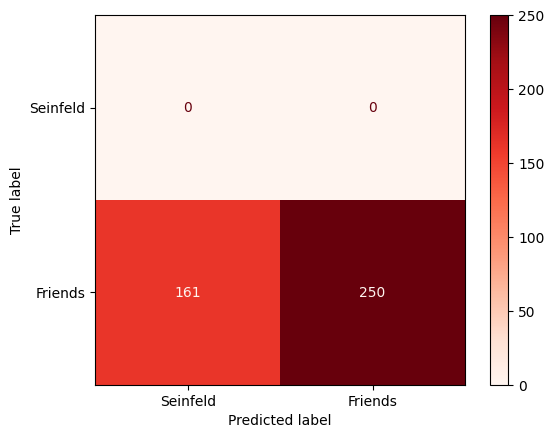

10/10 [==============================] - 0s 2ms/step
confusion matrix for elaine


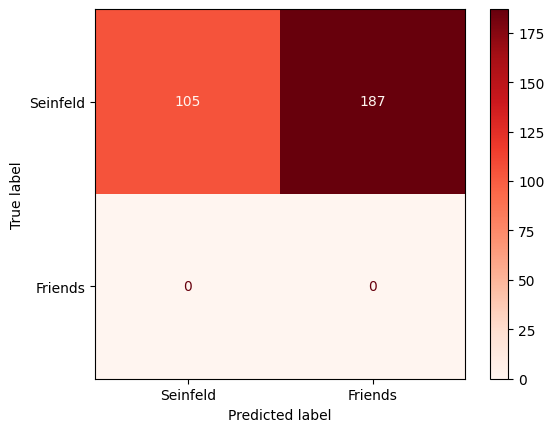

15/15 [==============================] - 0s 3ms/step
confusion matrix for george


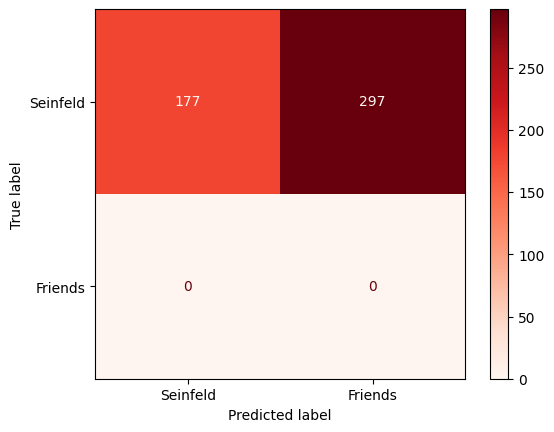

19/19 [==============================] - 0s 2ms/step
confusion matrix for jerry


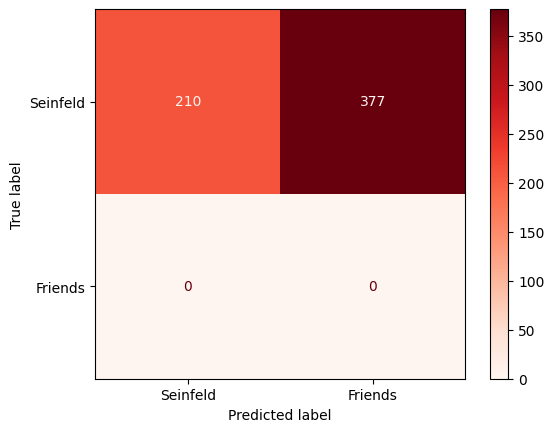

15/15 [==============================] - 0s 2ms/step
confusion matrix for joey


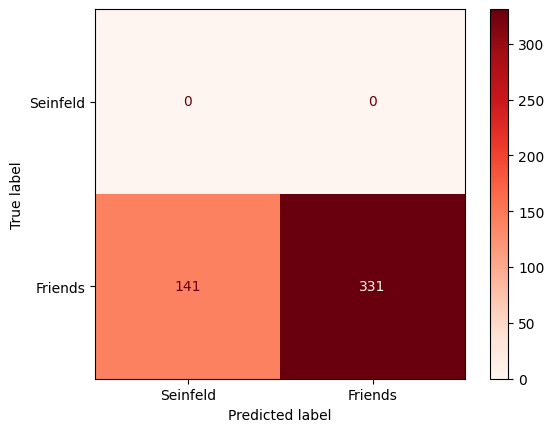

10/10 [==============================] - 0s 2ms/step
confusion matrix for kramer


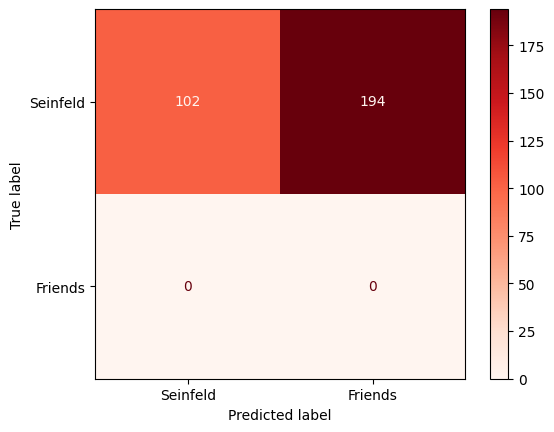

12/12 [==============================] - 0s 2ms/step
confusion matrix for monica


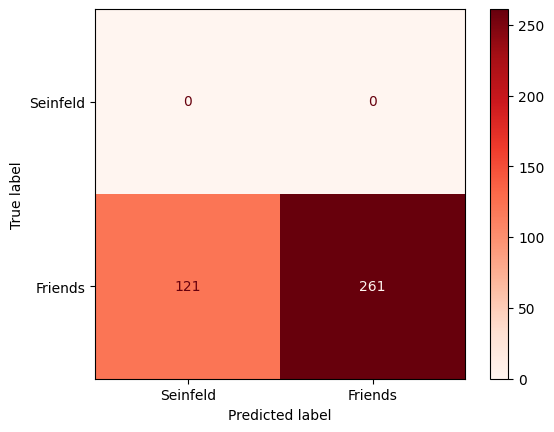

13/13 [==============================] - 0s 2ms/step
confusion matrix for phoebe


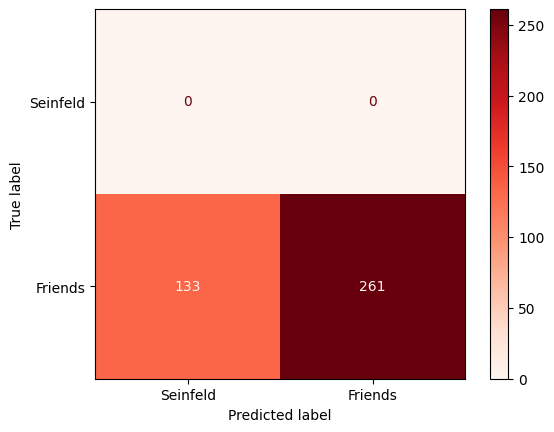

15/15 [==============================] - 0s 2ms/step
confusion matrix for rachel


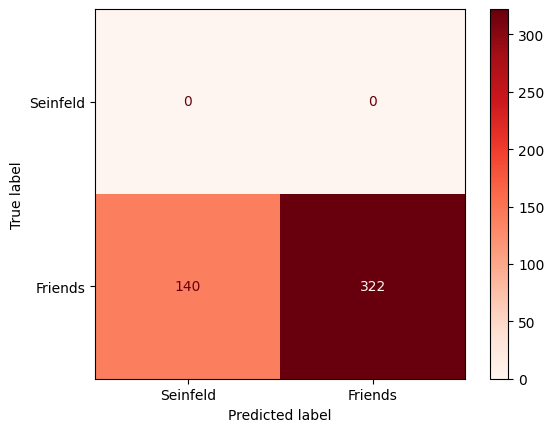

15/15 [==============================] - 0s 2ms/step
confusion matrix for ross


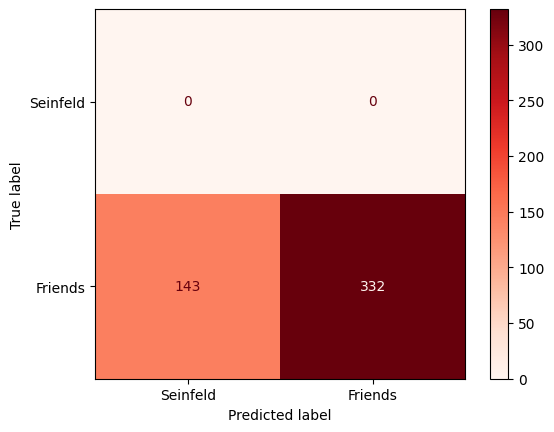

In [ ]:
for char in characters:
  df_char = test_df1.loc[test_df1["Character"] == char].copy()
  df_char['Dialogue'] = token.texts_to_sequences(df_char['Dialogue'])
  x_char = tf.keras.preprocessing.sequence.pad_sequences(df_char['Dialogue'], maxlen=max_words)
  y_char = df_char['Show']
  y_predict = model.predict(x_char).round()

  cm= confusion_matrix(y_char, y_predict)
  print('confusion matrix for '+char)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Seinfeld','Friends'])
  disp.plot(cmap=plt.cm.Reds)
  plt.show()


In [ ]:
results = {'model': ['ANN model'],
           'Test score (Accuracy)': acc_test_ann,
           'Train score (Accuracy)': acc_train_ann,
           'Number of trainable parameters': 696937 ,
           'Number of layers':6,
           'Regularization methods': ['Dropout'],
           'Number of epochs': 5,
           'Loss function': ['binary_crossentropy'],
           'Optimizer': ['adam'],
           'Embedding': []
           }

print(results)

import csv

filename = 'exercise3.csv'

with open(filename, 'w', newline='') as csvfile:
    fieldnames = ['model', 'Test score (Accuracy)', 'Train score (Accuracy)',
                  'Number of trainable parameters', 'Number of layers',
                  'Regularization methods', 'Number of epochs',
                  'Loss function', 'Optimizer', 'Embedding']

    # Create a CSV writer object
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header row
    writer.writeheader()

    # Write the data from the results dictionary
    writer.writerow(results)

print(f"CSV file '{filename}' has been created successfully.")

{'model': ['ANN model'], 'Test score (Accuracy)': [0.5608698129653931, 0.833922266960144], 'Train score (Accuracy)': [0.2630442976951599, 0.8673536777496338], 'Number of trainable parameters': 696937, 'Number of layers': 6, 'Regularization methods': ['Dropout'], 'Number of epochs': 5, 'Loss function': ['binary_crossentropy'], 'Optimizer': ['adam'], 'Embedding': []}
CSV file 'exercise3.csv' has been created successfully.
